# Iris Dataset Classification Problem

- **1.Attributes are numeric**
- **2.Multi class clasification problem**


In [1]:
# import ting libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression   # Logistic regression
from sklearn.tree import DecisionTreeClassifier   # Decision Tree
from sklearn.neighbors import KNeighborsClassifier   # KNN
from sklearn.svm import SVC   # SVM
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   # LDA
from sklearn.naive_bayes import GaussianNB     # naive bayes


In [2]:
# loading the dataset

df = pd.read_csv('Iris.csv')
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
# Droppingthe id column

df = df.drop(columns = 'Id')


In [5]:
print('The shape of the data is : ', df.shape)

The shape of the data is :  (150, 5)


In [6]:
# data description

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- **We can see that all numerical features have the same scale(cm)**
- **All the features lie in the range of 0 to 8**


In [7]:
# Checking out class(species) description
# i.e No. of instances (rows) which belong to each class

df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
# Data Visualization
# Univariate plots for better understanding of each atribute
# Multivariate Plots for better understanding 

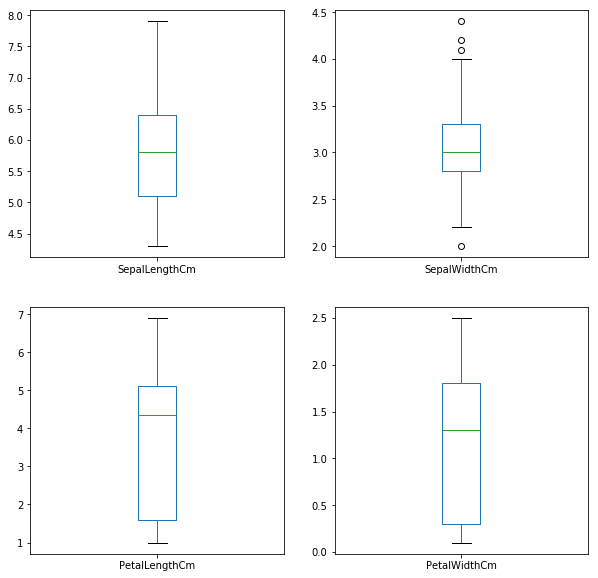

In [9]:
# Univariate plots
# Box plots and whisker plots

df.plot(kind = 'box' , subplots = True , layout = (2,2) , sharex = False , sharey = False, figsize = (10,10))
plt.show()

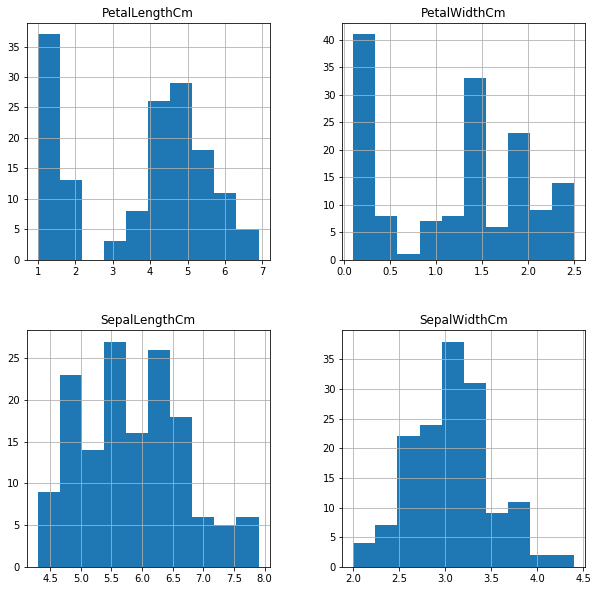

In [10]:
# creating histograms to get an idea about the distributions

df.hist(figsize = (10,10))
plt.show()

**Conclusion**

- **We can see that 2 of the input variables have Gaussian Distributions**
- **This is useful cause we can use algorithms that can exploit this assumption**

<Figure size 720x720 with 0 Axes>

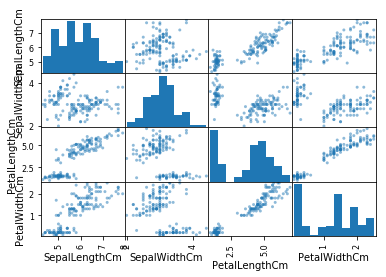

In [11]:
# Multivariate Plots

# We will use scatter matrix  to see the interactions between various variables

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (9,9)

# fig =plt.figure(figsize= (10,10))

scatter_matrix(df)
plt.show()

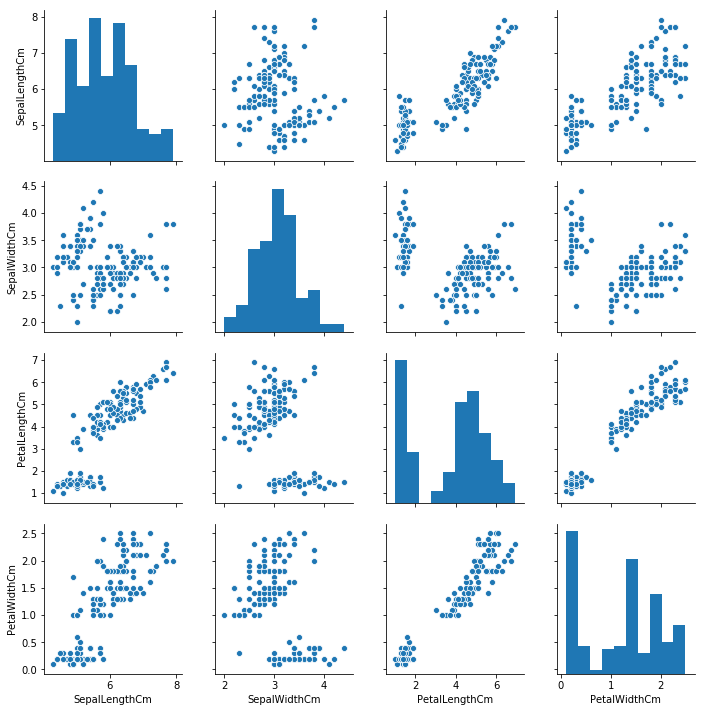

In [12]:
sns.pairplot(data = df)

In [19]:
# Evaluating algorithms

# Splittingthe dataset
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [20]:
# We will beusing 10 fld cv to estimate the accuracy

# We will we testing out 6 alogrithms in total. i.e a mixture of linear and non linear models

# Linear Models (Logistic Reg & LDA)
# Non Linear Models (KNN ,CART,NB & SVM)

In [23]:
# Spot checking algorithms

models = []
models.append(('LR' , LogisticRegression(solver = 'liblinear' , multi_class = 'auto')))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' ,GaussianNB()))
models.append(('SVM' , SVC(gamma = 'auto')))

In [30]:
# Evaluating models on each turn

results = []
names = []

for name,model in models :
    kfold = KFold(n_splits = 10 , random_state=7)
    cv_results = cross_val_score(model , X_train, y_train , cv = kfold , scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean() , cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


**Conclusions : We can see that SVM and KNN respectively hav the highest estimted accuracy score**

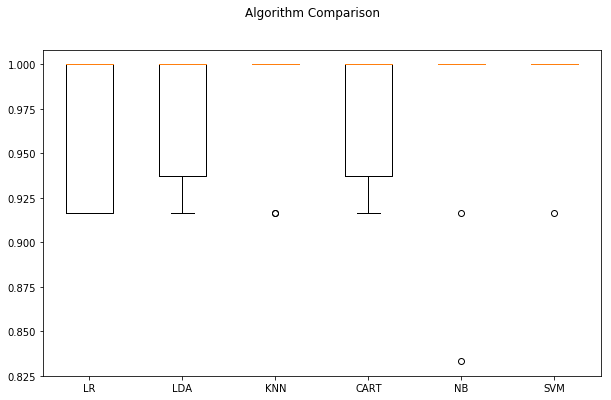

In [29]:
# Creating a plot of the model evaluation results to compare the spread and mean accuracy of each model

fig =plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observations : We can seethat the box and the whisker plots are squashed at the top range with many samples achieving 100% accuracy**

In [33]:
# Making predictions with KNN

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('Accuracy score :' , accuracy_score(y_test ,y_pred))
print('-'*50)
print('confusion_matrix :' ,confusion_matrix(y_test ,y_pred))
print('-'*50)
print('Classification report :' , classification_report(y_test , y_pred))



Accuracy score : 0.9
--------------------------------------------------
confusion_matrix : [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
--------------------------------------------------
Classification report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

